In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv("extendedData.csv").dropna()

/home/ejmejm/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,14,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
precond = ["B20.1", "E11.65", "F10.121", "F14.121", \
        "G47.33", "G80.4", "M05.10", "N18.9", \
        "R00.0", "R00.8", "R04.2", "R19.7", \
        "S62.308", "T84.011", "T85.622", "Z91.010"]

In [4]:
# Shuffle the data

data = data.sample(frac=1, random_state=42)

In [5]:
data.head()

,Unnamed: 0,id,city,DOB,address,longitude,sex,state,latitude,name,...,R04.2,G47.33,R00.0,R19.7,E11.65,B20.1,M05.10,F14.121,F10.121,N18.9
805787,805787,391405,Rufe,1982-05-08T22:11:38Z,22728 YOLO STREET,-95,F,Oklahoma,34,"LIPSCOMB,HADEEL",...,1.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,3.0,2.0
508019,508019,1457214,Forestville,1945-06-08T22:11:38Z,2425 APACHE STREET,-80,M,Pennsylvania,41,"CLOWES,MIKAYLA J",...,0.0,1.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,2.0
94025,94025,108462,Brockton,1989-05-08T22:11:38Z,3428 EVERGREEN CIRCLE #2,-105,M,Montana,48,"BELIHU,JOCQUAN J",...,1.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0
332245,332245,1299018,Delton,1956-06-08T22:11:38Z,110 STONEPINE LANE,-85,M,Michigan,43,"VORONOVA,NAINA N",...,0.0,1.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,2.0
482390,482390,1434148,Canmer,1949-12-08T22:11:38Z,11638 OLD SPRUCE,-86,M,Kentucky,37,"EASTER,ANNA G",...,0.0,1.0,0.0,0.0,2.0,3.0,3.0,3.0,3.0,2.0


In [6]:
def tobaccoConv(x):
    if x.lower() == "yes":
        return 1
    if x.lower() == "no":
        return 0
    return np.nan

data["TOBACCO"] = data["TOBACCO"].apply(lambda row: tobaccoConv(row))

In [ ]:
def sexConv(x):
    if x.lower() == "m":
        return 0
    elif x.lower() == "f":
        return 1
    return 2

data["sex"] = data["sex"].apply(lambda row: sexConv(row))

In [7]:
def riskCounter(x):
    return int(x["B20.1"] + x["E11.65"] + x["F10.121"] + x["F14.121"] + \
        x["M05.10"] + x["N18.9"] + \
        x["R00.0"] + x["R00.8"] + x["R04.2"] + x["R19.7"] + \
        x["S62.308"] + x["T84.011"] + x["T85.622"] + x["Z91.010"])

data["RISK_FACTOR"] = data.apply(lambda row: riskCounter(row), axis=1)

In [8]:
# Converting data to numeric format

data["SILVER"] = pd.to_numeric(data["SILVER"], errors="coerce")
data["PLATINUM"] = pd.to_numeric(data["PLATINUM"], errors="coerce")
data["WEIGHT"] = pd.to_numeric(data["WEIGHT"], errors="coerce")
data["HEIGHT"] = pd.to_numeric(data["HEIGHT"], errors="coerce")
data["latitude"] = pd.to_numeric(data["latitude"], errors="coerce")
data["longitude"] = pd.to_numeric(data["longitude"], errors="coerce")
data["ANNUAL_INCOME"] = pd.to_numeric(data["ANNUAL_INCOME"], errors="coerce")
data["TOBACCO"] = pd.to_numeric(data["TOBACCO"], errors="coerce")

In [9]:
# Add attributes

data["age"] = data.apply(lambda row: 2017 - int(row["DOB"][:4]), axis=1)
data["bmi"] = data.apply(lambda row: row["WEIGHT"] / row["HEIGHT"], axis=1)
data["plan_multiple"] = data.apply(lambda row: (row["SILVER"] - row["BRONZE"]) / 2, axis=1)
data["personal_risk"] = data.apply(lambda row: row["BRONZE"] - row["plan_multiple"], axis=1)

In [10]:
data = data.dropna()

# Risk Factor Distribution

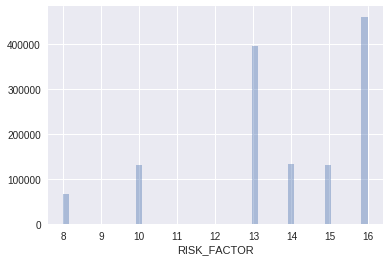

In [11]:
sns.distplot(data["RISK_FACTOR"], kde=False)

# Plan Count

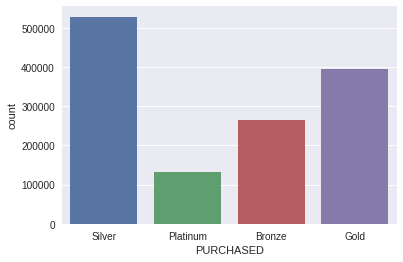

In [12]:
sns.countplot(x=data["PURCHASED"])

# Plan Pricing Distributions

(0, 150)

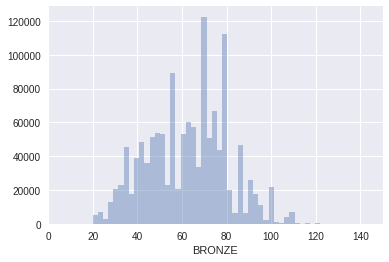

In [13]:
sns.distplot(data["BRONZE"], kde=False)
sns.plt.xlim(0, 150)

(0, 200)

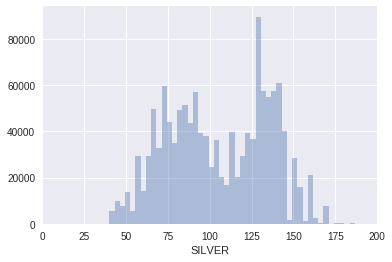

In [14]:
sns.distplot(data["SILVER"], kde=False)
sns.plt.xlim(0, 200)

(0, 300)

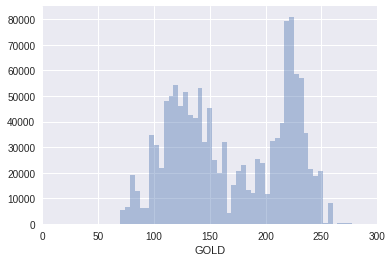

In [15]:
sns.distplot(data["GOLD"], kde=False)
sns.plt.xlim(0, 300)

(0, 450)

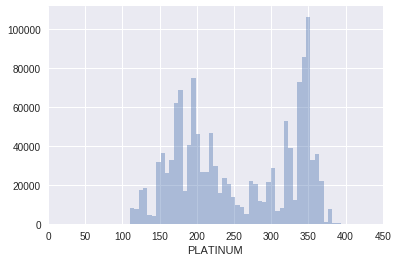

In [16]:
sns.distplot(data["PLATINUM"], kde=False)
sns.plt.xlim(0, 450)

(0, 420)

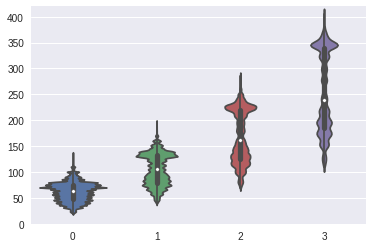

In [17]:
sns.violinplot(data=[data["BRONZE"], data["SILVER"], data["GOLD"], data["PLATINUM"]])
sns.plt.ylim(0, 420)

In [18]:
pData = data.sample(n=1000)

# Tobacco, BMI, and Age correlations with premium price

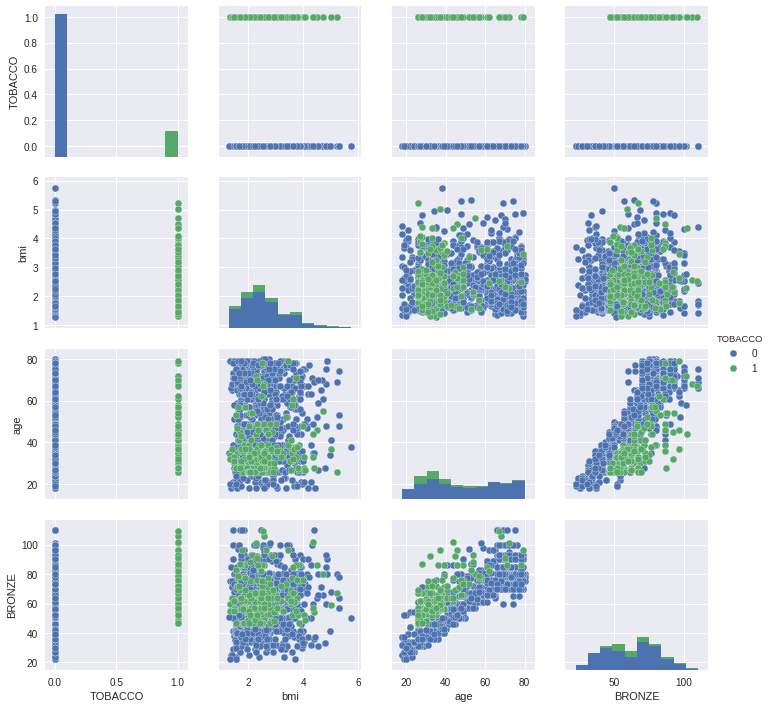

In [19]:
sns.pairplot(pData[["TOBACCO", "bmi", "age", "BRONZE"]], hue="TOBACCO")

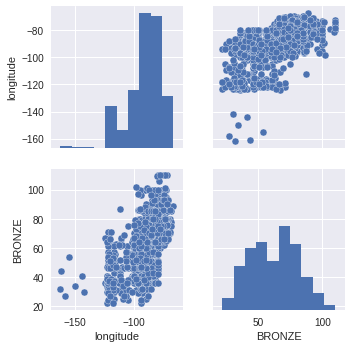

In [20]:
sns.pairplot(pData[["longitude", "BRONZE"]])

# Total risk severity vs. premium price

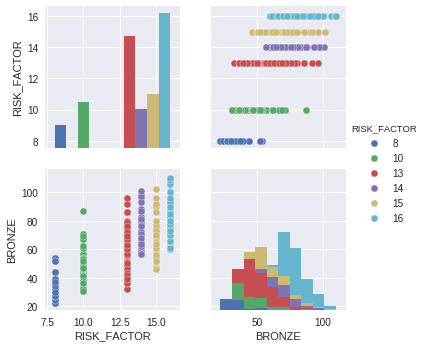

In [21]:
sns.pairplot(pData[["RISK_FACTOR", "BRONZE"]], hue="RISK_FACTOR")

# Correlation Analysis

In [22]:
corr_x = []
corr_y = []

for column in data:
    if data[column].dtype in (np.int64, np.float64) and \
    column not in ("BRONZE", "SILVER", "GOLD", "PLATINUM", "personal_risk"):
        corr = data["personal_risk"].corr(data[column])
        corr_x.append(column)
        corr_y.append(abs(corr))
        # print("{}: {}".format(column, corr))

## Personal Risk Correlation

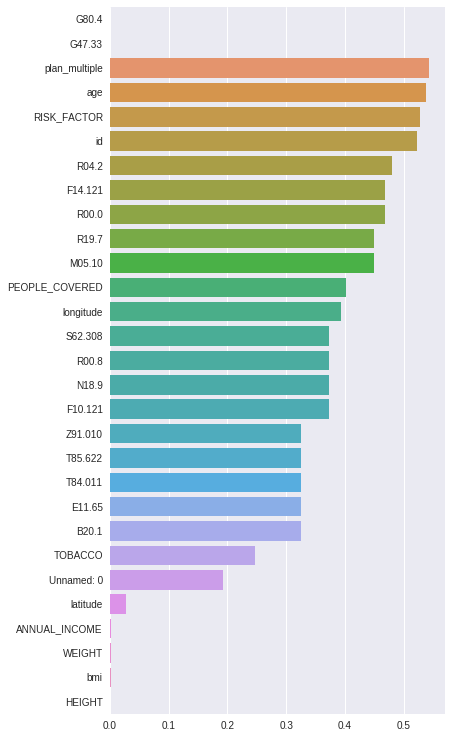

In [23]:
g_corr_x = []
g_corr_y = []
for y, x in sorted(zip(corr_y, corr_x), reverse=True):
    g_corr_x.append(x)
    g_corr_y.append(y)

f, ax = plt.subplots(figsize=(6, 13))
sns.barplot(y=g_corr_x, x=g_corr_y)
sns.despine(left=True, bottom=True)

In [24]:
corr_x = []
corr_y = []

for column in data:
    if data[column].dtype in (np.int64, np.float64) and \
    column not in ("plan_multiple", "personal_risk", "BRONZE",
                   "SILVER", "GOLD", "PLATINUM"):
        corr = data["plan_multiple"].corr(data[column])
        corr_x.append(column)
        corr_y.append(abs(corr))
        # print("{}: {}".format(column, corr))

## Plan Multiple Correlation

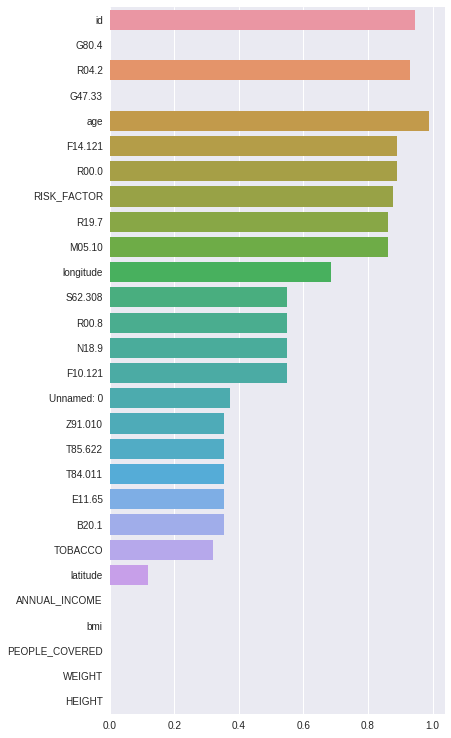

In [25]:
g_corr_x = []
g_corr_y = []
for y, x in sorted(zip(corr_y, corr_x), reverse=True):
    g_corr_x.append(x)
    g_corr_y.append(y)

f, ax = plt.subplots(figsize=(6, 13))
sns.barplot(y=g_corr_x, x=g_corr_y)
sns.despine(left=True, bottom=True)

## Age Correlation

In [26]:
corr_x = []
corr_y = []

for column in data:
    if data[column].dtype in (np.int64, np.float64) and \
    column not in ("age"):
        corr = data["age"].corr(data[column])
        corr_x.append(column)
        corr_y.append(corr)
        # print("{}: {}".format(column, corr))

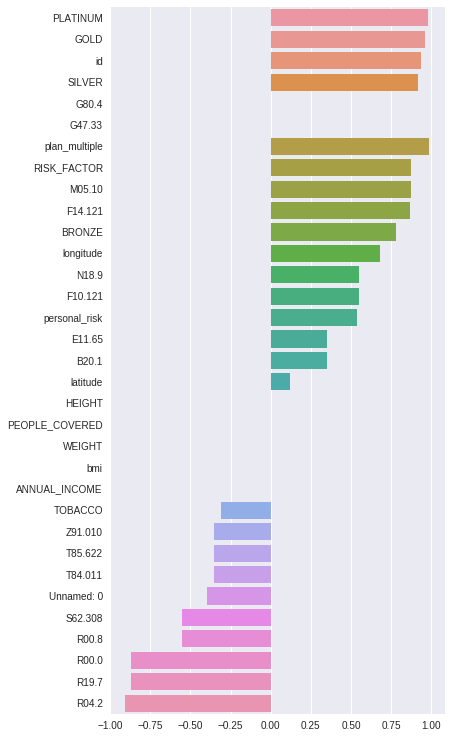

In [27]:
g_corr_x = []
g_corr_y = []
for y, x in sorted(zip(corr_y, corr_x), reverse=True):
    g_corr_x.append(x)
    g_corr_y.append(y)

f, ax = plt.subplots(figsize=(6, 13))
sns.barplot(y=g_corr_x, x=g_corr_y)
sns.despine(left=True, bottom=True)

# 1 : 1 correlated preconditions

In [28]:
pairs = []

for i in range(len(precond)):
    for j in range(i+1, len(precond)):
        if abs(data[precond[i]].corr(data[precond[j]])) == 1:
            pairs.append((precond[i], precond[j]))
            print("{}\t{}".format(pairs[-1][0], pairs[-1][1]))

B20.1	E11.65
B20.1	T84.011
B20.1	T85.622
B20.1	Z91.010
F14.121	R00.0
M05.10	R19.7
N18.9	R00.8
N18.9	S62.308
R00.8	S62.308


In [29]:
print(len(data[data["F14.121"] == 0]))
print(len(data[data["F14.121"] == 3]))
print(len(data[data["R00.0"] == 0]))
print(len(data[data["R00.0"] == 1]))

594396
725780
725780
594396


# Classification of plan purchased

In [30]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

/home/ejmejm/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
names = ["XGBoost", 
    "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [32]:
classifiers = [
    XGBClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [33]:
classSamples = data.sample(n=2000)

In [34]:
import warnings
warnings.filterwarnings('ignore')
X = classSamples[["ANNUAL_INCOME", "RISK_FACTOR", "age"]]
y = classSamples["PURCHASED"]

le = LabelEncoder()
# for column in X:
#     X[column] = le.fit_transform(X[column])
#     X[column] = StandardScaler().fit_transform(X[column])
#X["TOBACCO"] = le.fit_transform(X["TOBACCO"])
#X[:100]

# for i, val in enumerate(y):
#     if y[i] == "Bronze":

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

In [36]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.41249999999999998

In [37]:
# for name, clf in zip(names, classifiers):
#     clf.fit(X_train, y_train)
#     score = clf.score(X_test, y_test)
#     print("{}: {}".format(name, score))

# Regression for premium pricing

## Plan multiple

In [39]:
from sklearn import linear_model
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor

In [40]:
classSamples = data.sample(frac=1, random_state=42)

In [49]:
import warnings
warnings.filterwarnings('ignore')
X_reg = classSamples[["age", "R04.2", "F14.121", "RISK_FACTOR", 
                       "R19.7", "longitude", "S62.308"]]

y_reg = classSamples["plan_multiple"]

In [50]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42)

In [51]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit(X_train_reg, y_train_reg)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [52]:
predictions = reg.predict(X_test_reg)
errors = abs(predictions - y_test_reg.values)

In [53]:
print("Mean error:", np.mean(errors))
print("Error stddev:", np.std(errors))

Mean error: 0.537158676231
Error stddev: 0.40429865834


In [54]:
print("Plan multiple mean:", np.mean(data["plan_multiple"]))
print("Plan multiple stddev:", np.std(data["plan_multiple"]))

Plan multiple mean: 21.299599447346413
Plan multiple stddev: 6.941259565913694


In [55]:
joblib.dump(reg, 'plan_multiple_reg.pkl')

['plan_multiple_reg.pkl']

## Personal Risk

In [75]:
import warnings
warnings.filterwarnings('ignore')
X_reg = classSamples[["plan_multiple", "age", "RISK_FACTOR", "S62.308"]]
y_reg = classSamples["personal_risk"]

#X_reg["TOBACCO"] = le.fit_transform(X_reg["TOBACCO"])

In [76]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42)

In [77]:
reg = linear_model.Ridge(alpha=0.5)
reg.fit(X_train_reg, y_train_reg)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
predictions = reg.predict(X_test_reg)
errors = abs(predictions - y_test_reg.values)

In [79]:
print("Mean error:", np.mean(errors))
print("Error stddev:", np.std(errors))

Mean error: 8.7633518022
Error stddev: 6.69016509866


In [80]:
print("Personal risk mean:", np.mean(data["personal_risk"]))
print("Personal risk stddev:", np.std(data["personal_risk"]))

Personal risk mean: 41.4495703603156
Personal risk stddev: 13.247863966120331


In [81]:
joblib.dump(reg, 'personal_risk_reg.pkl')

['personal_risk_reg.pkl']

## Random Forest

In [126]:
import warnings
warnings.filterwarnings('ignore')

columns = []
for column in data:
    if data[column].dtype in (np.int64, np.float64) and \
        column not in ("BRONZE", "SILVER", "GOLD", "PLATINUM", "id", "Unnamed: 0", "personal_risk"):
            columns.append(column)
            
X_reg = classSamples[columns]
y_reg = classSamples["personal_risk"]

In [127]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
        X_reg, y_reg, test_size=0.2, random_state=42)

In [128]:
reg = RandomForestRegressor()
reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

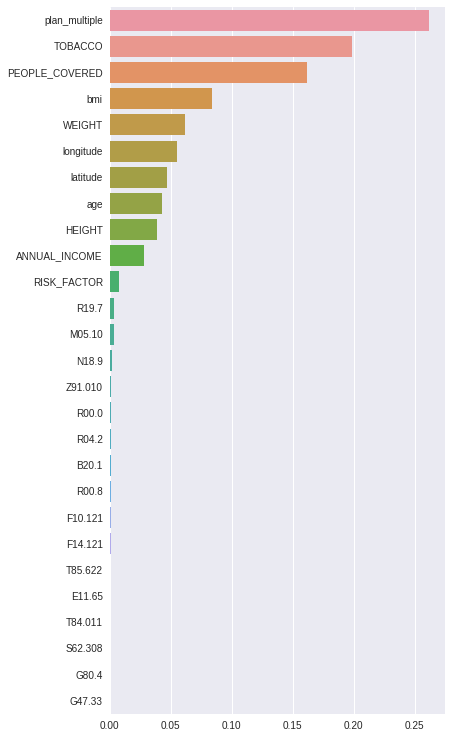

In [134]:
g_corr_x = []
g_corr_y = []
for y, x in sorted(zip(reg.feature_importances_, columns), reverse=True):
    g_corr_x.append(x)
    g_corr_y.append(y)
    
f, ax = plt.subplots(figsize=(6, 13))
sns.barplot(y=g_corr_x, x=g_corr_y)
sns.despine(left=True, bottom=True)

In [130]:
predictions = reg.predict(X_test_reg)
errors = abs(predictions - y_test_reg.values)

In [131]:
print("Mean error:", np.mean(errors))
print("Error stddev:", np.std(errors))

Mean error: 6.24763207825
Error stddev: 5.60551170946


In [132]:
print("Personal risk mean:", np.mean(data["personal_risk"]))
print("Personal risk stddev:", np.std(data["personal_risk"]))

Personal risk mean: 41.4495703603156
Personal risk stddev: 13.247863966120331


# Neural Network Prediction Model

In [ ]:
import tensorflow as tf
import tflearn

In [ ]:
inp = tflearn.input_data(shape=[None, 3])

net = tflearn.fully_connected(inp, 64, activation="relu")
net = tflearn.fully_connected(net, 64, activation="relu")
net = tflearn.fully_connected(net, 32, activation="relu")
net = tflearn.fully_connected(net, 1, activation="relu")
net = tflearn.regression(net)

model = tflearn.DNN(net)

In [ ]:
xvals = X_train_reg.values
yvals = y_train_reg.values.reshape([-1, 1])

In [ ]:
yvals

In [ ]:
model.fit(xvals, yvals)

In [ ]:
model.predict(X_test_reg[:5])

In [ ]:
y_test_reg